In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape([60000, 28, 28, 1])
test_images = test_images.reshape([10000, 28, 28, 1])
print(train_images.shape, test_images.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


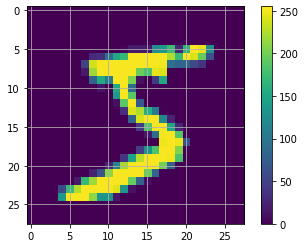

In [0]:
# Preprocess the data
train_images_1 = train_images.reshape([60000, 28, 28])
test_images_1 = test_images.reshape([10000, 28, 28])
plt.figure()
plt.imshow(train_images_1[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [0]:
# Scale the values to 0-1 - Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

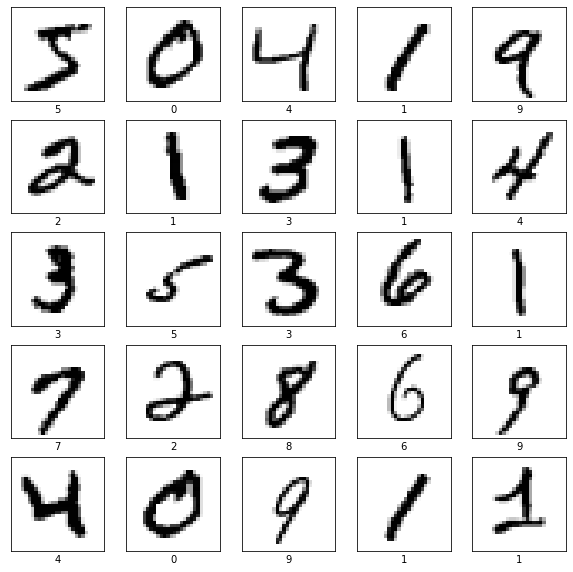

In [0]:
# Verify tat the data is in the correct format and ready to build the network
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_1[i], cmap=plt.cm.binary) # displays as grayscale
    plt.xlabel(train_labels[i])
plt.show()

In [0]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3)))
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.Dropout(0.2))

# add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64))
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10)) # 10 nodes
model.add(layers.LeakyReLU(alpha=0.2))

model.add(layers.Dense(10, activation='softmax')) # To output 10 classes

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])    # use categorical_crossentropy if outputs are one-hot. If integers, use spare_categorical_crossentropy

In [0]:
# Train the model
train_losses = []
test_losses = []
iteration_checkpoints = []
train_batch_size = 128
test_batch_size = 40
epochs = 10
iteration = 0
iterations = int(60000/train_batch_size)
for epoch in range(epochs):                         # For number of epochs
  print('Epoch Count:', epoch)
  if iteration == 0:
    print('Iteration Count:', 0)
    print('Training has not start yet.')
  else:
    print('Iteration Count:', iteration_checkpoints[-1])
    print('Epoch =', epoch, ',', history.history)
  for i in range(iterations):                                         # For number of iterations
    iteration += 1
    # Select batch_size of 128 randomized images for training set
    train_idx = np.random.randint(0, train_images.shape[0], train_batch_size) # Randomized indices of training set
    train_imgs = train_images[train_idx]                                      # Retrieve train images
    train_imgs_label = train_labels[train_idx]                                # Match train images with train labels
    # Select batch_size of  randomized images for test set
    test_idx = np.random.randint(0, test_images.shape[0], test_batch_size)    # Randomized indices of test set
    test_imgs = test_images[test_idx]                                         # Retrieve test images
    test_imgs_label = test_labels[test_idx]                                   # Match test images with test labels
    history = model.fit(train_imgs, train_imgs_label, epochs=1, batch_size=train_batch_size, steps_per_epoch=1, validation_data=(test_imgs, test_imgs_label), verbose=0) # "Fits" the model in the training data
    train_losses.append(history.history['loss'])
    test_losses.append(history.history['val_loss']*100)
    if i == 0:
      iteration_checkpoints.append(i)
    else:
      iteration_checkpoints.append(iteration)

Epoch Count: 0
Iteration Count: 0
Training has not start yet.
Epoch Count: 1
Iteration Count: 468
Epoch = 1 , {'loss': [0.07847589254379272], 'accuracy': [0.984375], 'val_loss': [0.09339933097362518], 'val_accuracy': [0.975]}
Epoch Count: 2
Iteration Count: 936
Epoch = 2 , {'loss': [0.07763931155204773], 'accuracy': [0.96875], 'val_loss': [0.21214242279529572], 'val_accuracy': [0.925]}
Epoch Count: 3
Iteration Count: 1404
Epoch = 3 , {'loss': [0.06723841279745102], 'accuracy': [0.9921875], 'val_loss': [0.0008860712987370789], 'val_accuracy': [1.0]}
Epoch Count: 4
Iteration Count: 1872
Epoch = 4 , {'loss': [0.011601520702242851], 'accuracy': [1.0], 'val_loss': [0.006283519323915243], 'val_accuracy': [1.0]}
Epoch Count: 5
Iteration Count: 2340
Epoch = 5 , {'loss': [0.010148937813937664], 'accuracy': [0.9921875], 'val_loss': [0.010416505858302116], 'val_accuracy': [1.0]}
Epoch Count: 6
Iteration Count: 2808
Epoch = 6 , {'loss': [0.02131793648004532], 'accuracy': [0.9921875], 'val_loss': [

In [0]:
# Evaluate loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest accuracy:', test_acc) # Note: The gap between test accuracy & training accuracy signifies overfitting

10000/10000 [==============================] - 4s 369us/sample - loss: 0.0396 - accuracy: 0.9895

Test accuracy: 0.9895


In [0]:
# make predictions
predictions = model.predict(test_images)
model.predict(test_images)
predictions[0]
np.argmax(predictions[0]) # argmax returns the value of the index


7

7

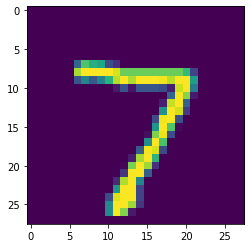

In [0]:
plt.imshow(test_images_1[0])
test_labels[0]

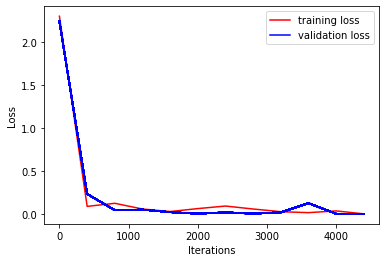

In [0]:
plt.plot(iteration_checkpoints[::400], train_losses[::400], 'r')
plt.plot(iteration_checkpoints[::400], test_losses[::400], 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['training loss', 'validation loss'])
plt.show()